### Importing essential Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv("diabetes.csv")

### Exploring the data

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
df.shape

(2000, 9)

In [8]:
df.info

<bound method DataFrame.info of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0               2      138             62             35        0  33.6  \
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                   

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [10]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [11]:
df=df.rename(columns={"DiabetesPedigreeFunction":"DPF"})

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Data Cleaning & Analysis

In [13]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [14]:
df_copy=df.copy()
df_copy[["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]]=df_copy[["Glucose", "BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)

In [15]:
df_copy.isnull().sum()

Pregnancies        0
Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
DPF                0
Age                0
Outcome            0
dtype: int64

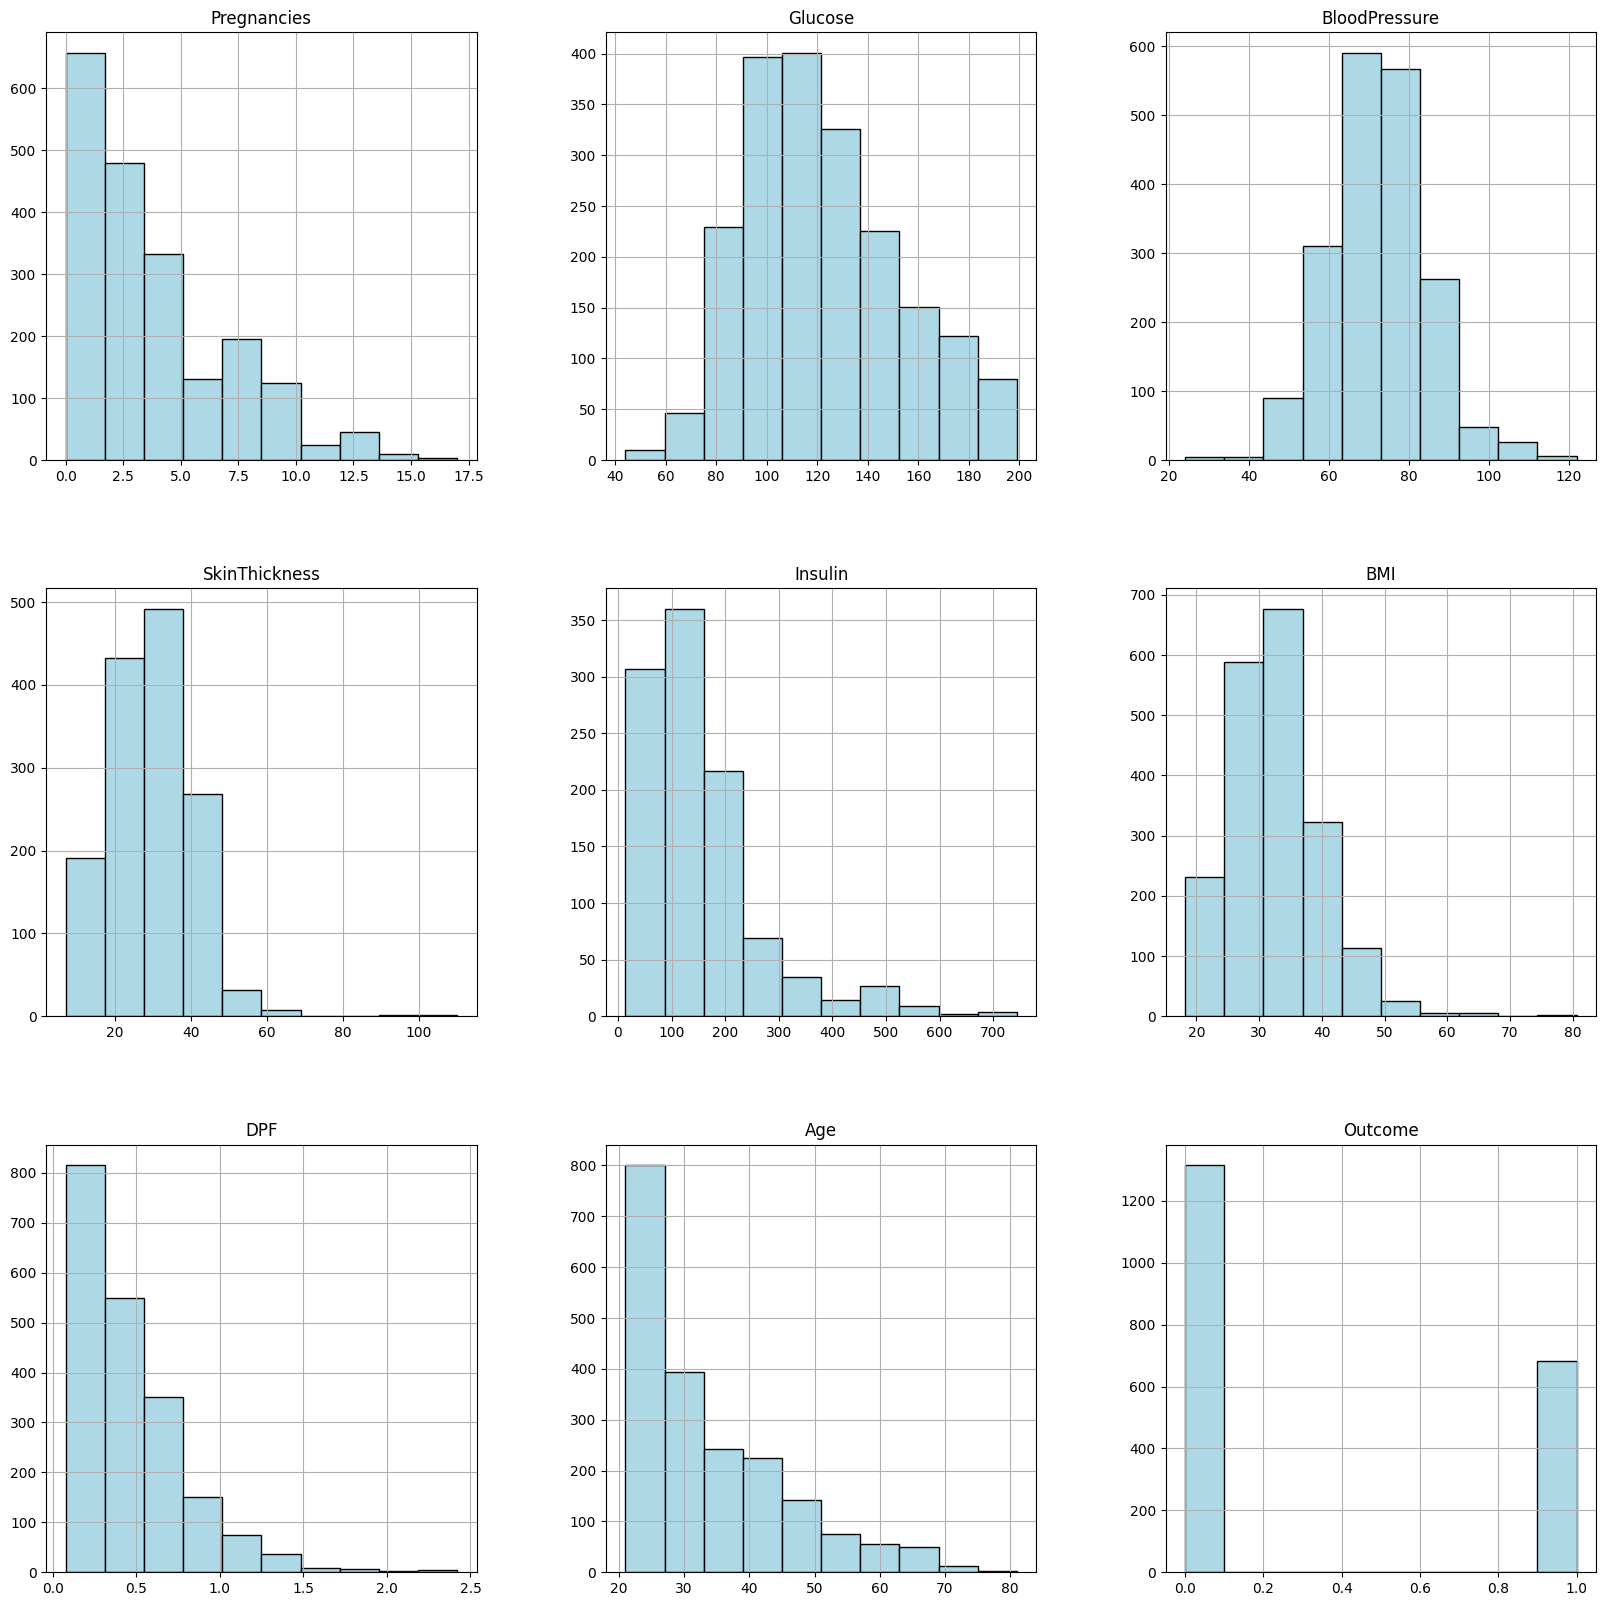

In [16]:
# Checking the distribution of NaN values
hist=df_copy.hist(figsize=(20,20), facecolor="lightblue", ec="black")

In [17]:
# Replacing the NaN values based on the distribution
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(), inplace=True)
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(), inplace=True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(), inplace=True)
df_copy["Insulin"].fillna(df_copy["Insulin"].median(), inplace=True)
df_copy["BMI"].fillna(df_copy["BMI"].median(), inplace=True)

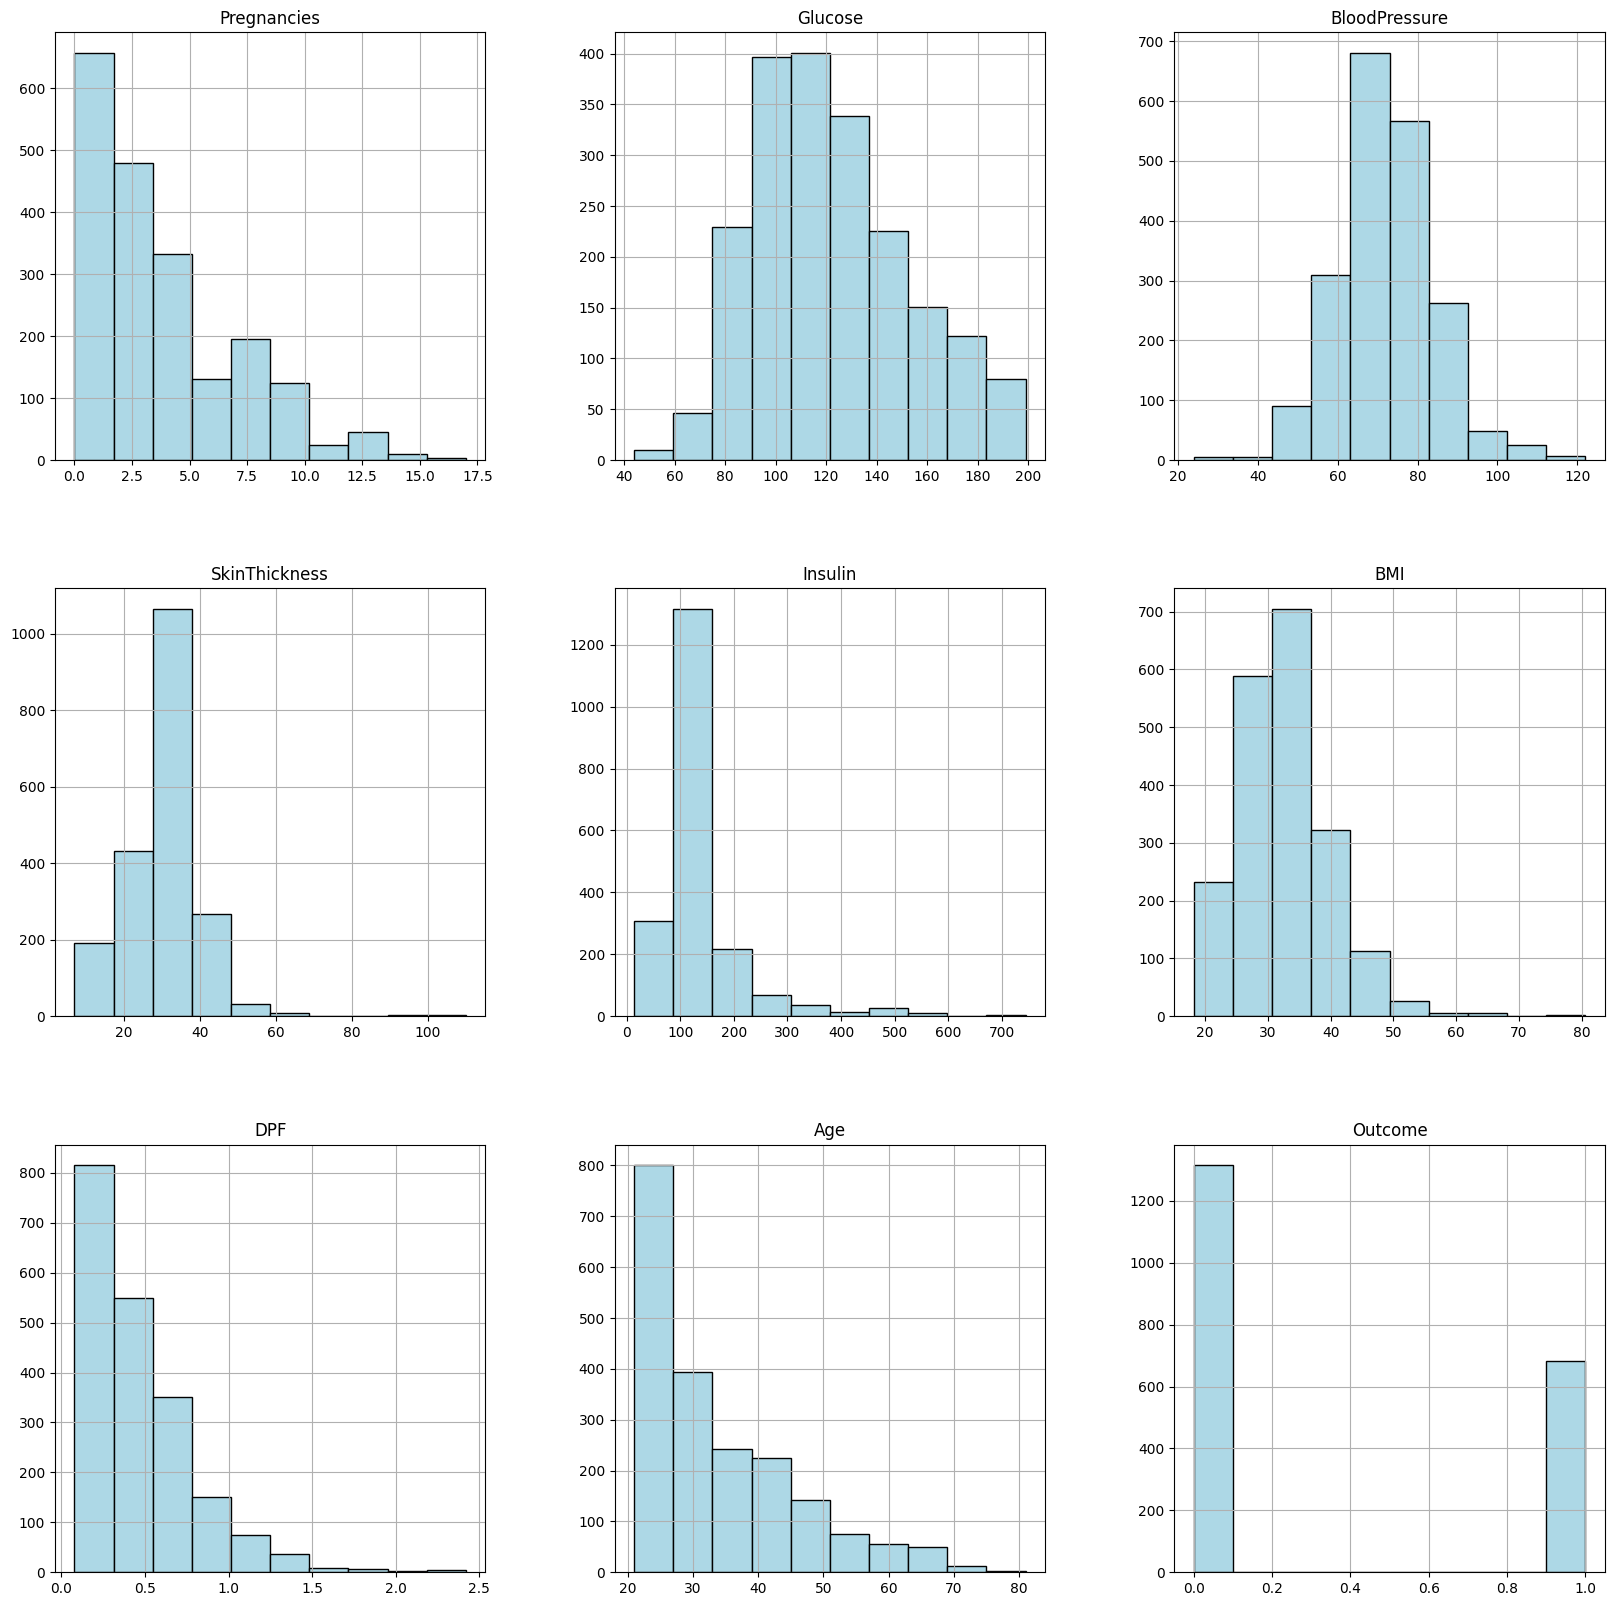

In [18]:
hist=df_copy.hist(figsize=(20,20), facecolor="lightblue", ec="black")

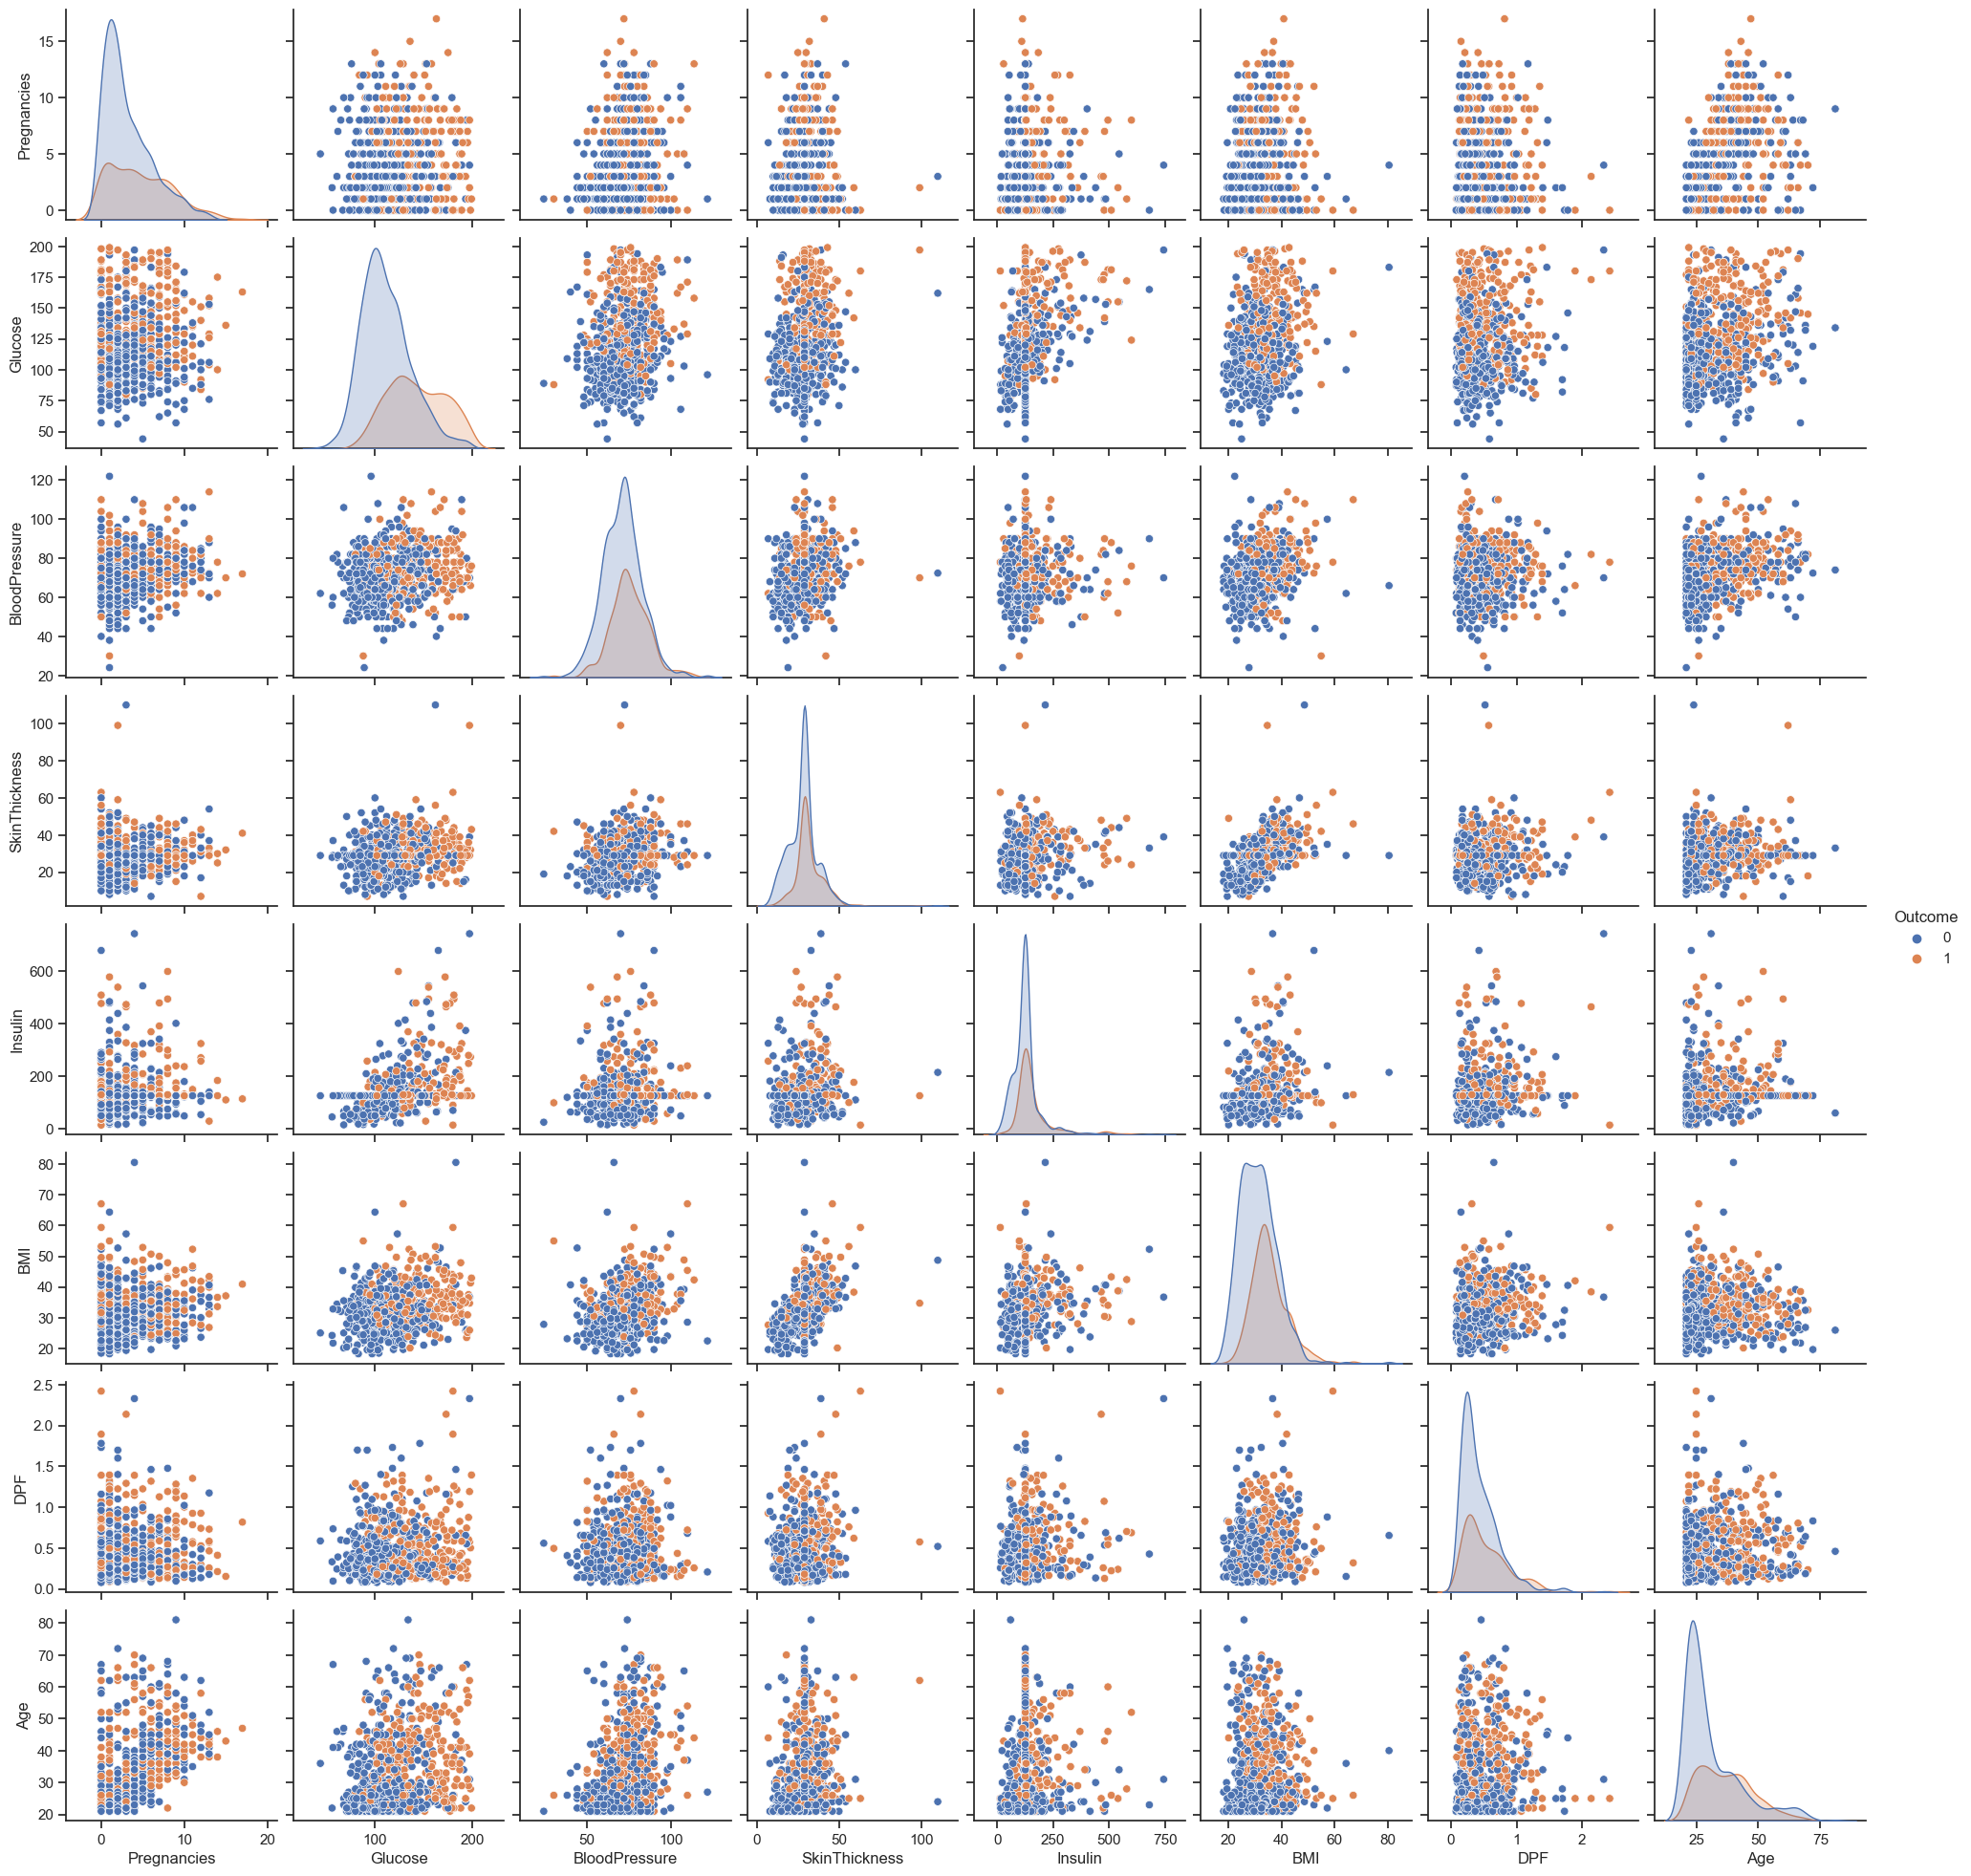

In [19]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df_copy, hue="Outcome")

In [20]:
df_copy.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

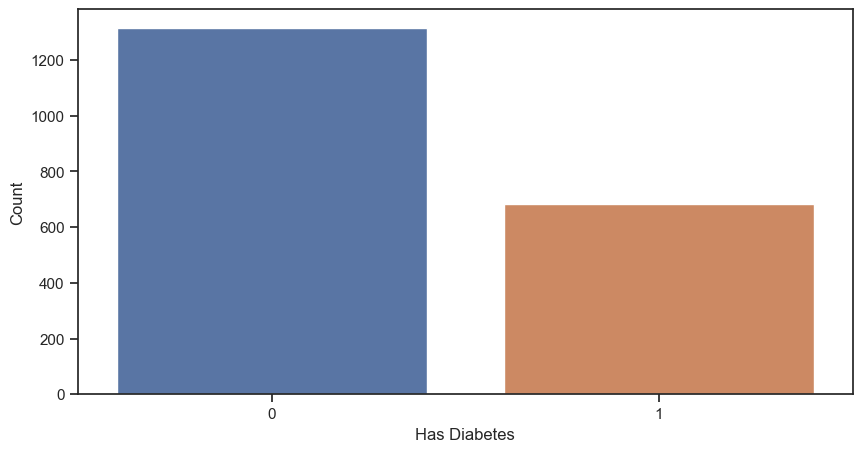

In [21]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outcome", data=df)
plt.xlabel("Has Diabetes")
plt.ylabel("Count")
plt.show()

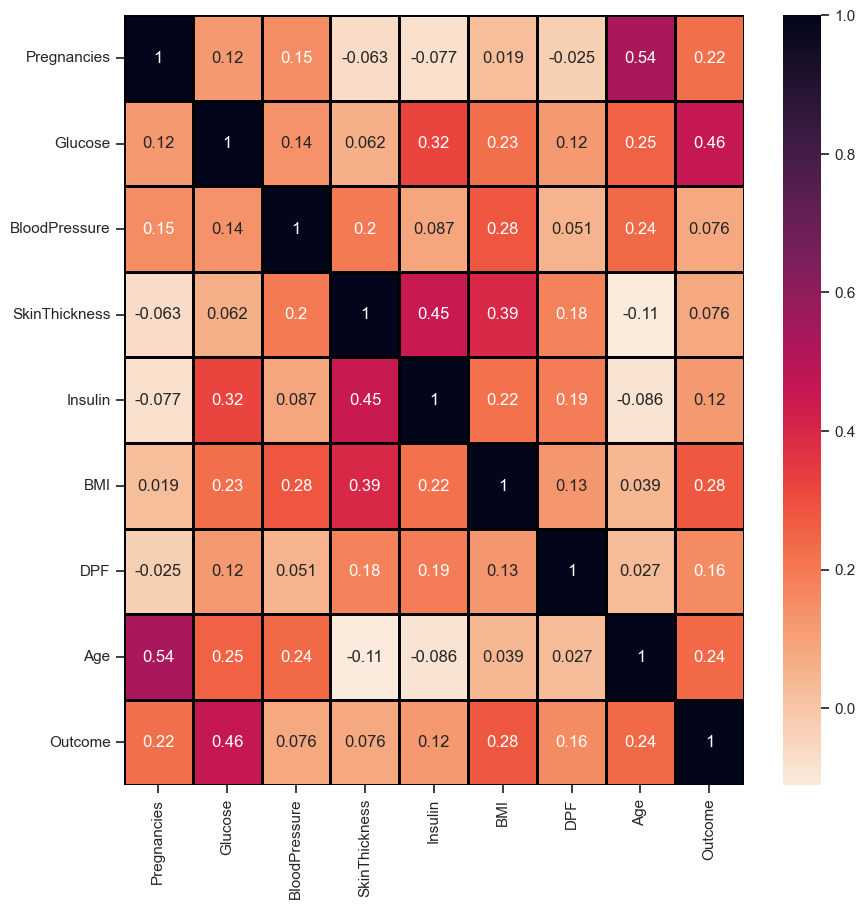

In [22]:
# Checking the correlation between the features
plt.figure(figsize=(10,10))
p=sns.heatmap(df.corr(),annot=True, cmap="rocket_r", linewidths=2, linecolor="Black")

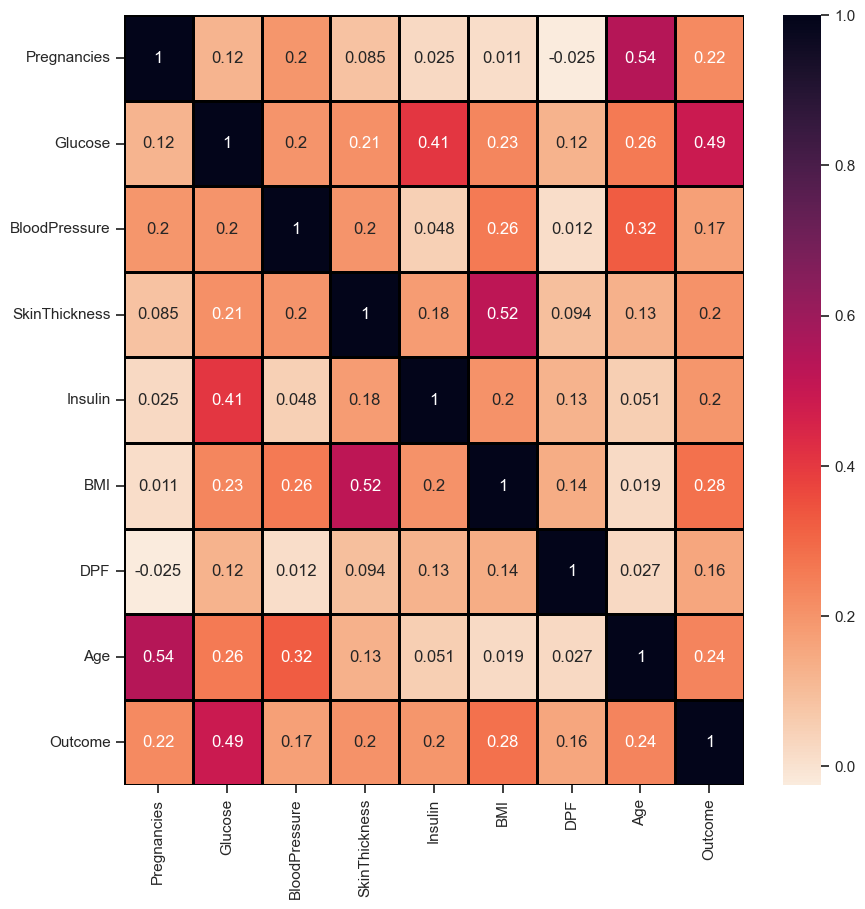

In [23]:
plt.figure(figsize=(10,10))
p=sns.heatmap(df_copy.corr(),annot=True, cmap="rocket_r", linewidths=2, linecolor="Black")

In [24]:
data=df_copy
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


### Model Building

In [25]:
from sklearn.model_selection import train_test_split
X=data.drop(columns="Outcome")
y=data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2, random_state=10)
print("X_train_size:{},X_test_size:{}". format(X_train.shape, X_test.shape))

X_train_size:(1600, 8),X_test_size:(400, 8)


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

### Finding the best Model

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [28]:
def best_model(X, y):
    models= {
        "logistic_regression": {
            "model": LogisticRegression(solver="lbfgs", multi_class="auto"),
            "parameters": {
                "C" : [1,5,10]
            }
        },
        
        "decision_tree" : {
            "model" : DecisionTreeClassifier(splitter="best"),
            "parameters":{
                "criterion": ["gini", "entropy"],
                "max_depth": [5,10]
            }
        },
        
        "random_forest": {
            "model" : RandomForestClassifier(criterion="gini"),
            "parameters": {
                "n_estimators": [10,15,20,50,100,200]
            }
        },
        
        "svm" : {
            "model" : SVC(gamma="auto"),
            "parameters": {
                "C": [1,10,20],
                "kernel":["rbf", "linear"]
            }
        },
        
        "KNN" :{
            "model" : KNeighborsClassifier(n_neighbors=6, metric="euclidean", weights="distance"),
            "parameters": {
                "n_neighbors": [3]
            }
        }
    }
    
    scores=[]
    
    cv_shuffle=ShuffleSplit(n_splits=5, test_size=0.20, random_state=8)
    
    for model_name, model_params in models.items():
        gs= GridSearchCV(model_params["model"], model_params["parameters"], cv=cv_shuffle, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model": model_name,
            "best_parameters": gs.best_params_,
            "score" :gs.best_score_
        })
    return pd.DataFrame(scores, columns=["model", "best_parameters", "score"])
best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.764375
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.903125
2,random_forest,{'n_estimators': 100},0.956875
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.866875
4,KNN,{'n_neighbors': 3},0.953125


In [29]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(RandomForestClassifier(n_estimators=100,random_state=8), X_train, y_train)
print("Average Accuracy : {}%".format(round(sum(scores)*100/len(scores))))

Average Accuracy : 96%


### Proceeding with the Random Forest Model

In [30]:
classifier=RandomForestClassifier(n_estimators=100, random_state=8)
classifier.fit(X_train,y_train)

RandomForestClassifier(random_state=8)

### Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[267,   2],
       [  6, 125]], dtype=int64)

Text(117.24999999999999, 0.5, 'Actual values')

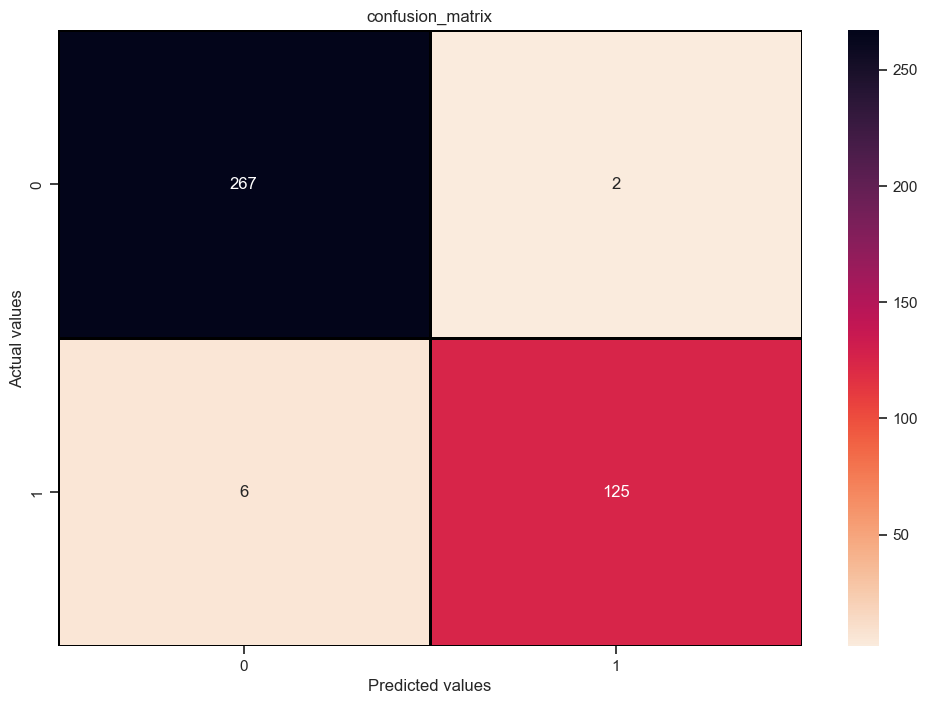

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap="rocket_r", linewidth=2,linecolor="Black", fmt="g")
plt.title("confusion_matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [33]:
score=accuracy_score(y_test,y_pred)*100
score

98.0

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       269
           1       0.98      0.95      0.97       131

    accuracy                           0.98       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.98      0.98       400



In [35]:
y_train_pred=classifier.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[1047,    0],
       [   0,  553]], dtype=int64)

Text(117.24999999999999, 0.5, 'Actual values')

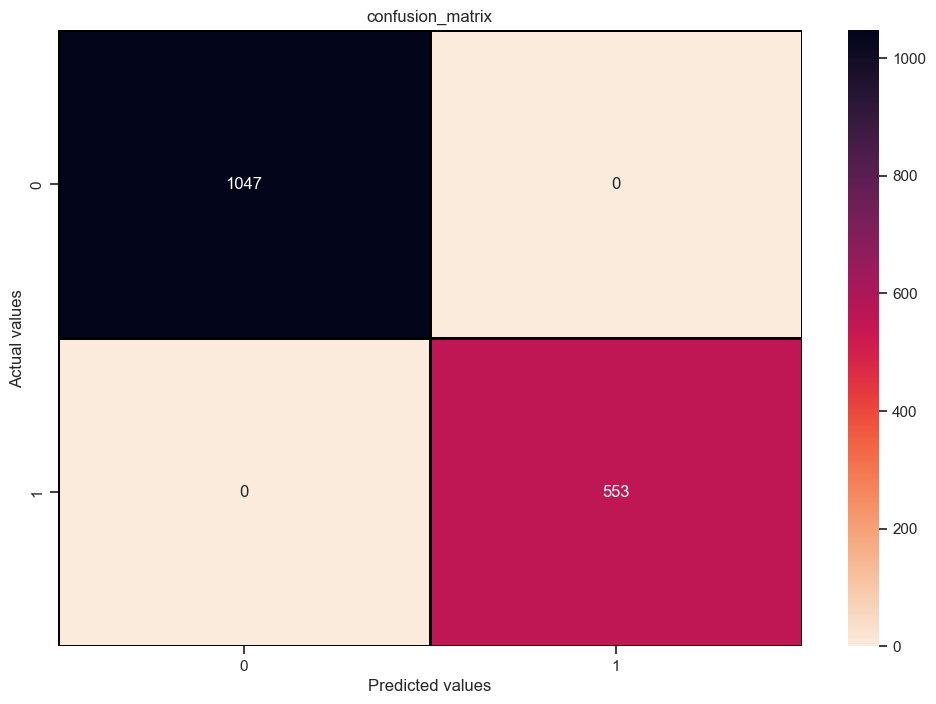

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True,cmap="rocket_r", linewidths=2,linecolor="Black", fmt="g")
plt.title("confusion_matrix")
plt.xlabel("Predicted values")
plt.ylabel("Actual values")

In [37]:
score=accuracy_score(y_train,y_train_pred)*100
score

100.0

In [38]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1047
           1       1.00      1.00      1.00       553

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



### Predictions

In [39]:
def predict_diabetes(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age):
    preg=int(Pregnancies)
    glucose=int(Glucose)
    bp=float(BloodPressure)
    st=float(SkinThickness)
    insulin=float()
    bmi=float(BMI)
    dpf=float(DPF)
    age=int(Age)
    x=[[preg,glucose,bp,st,insulin,bmi,dpf,age]]
    x=sc.transform(x)
    
    return classifier.predict(x)

In [40]:
prediction=predict_diabetes(2,81,72,15,76,30.1,0.547,25)[0]
if prediction:
    print("Oops! You have diabetes.")
else:
    print("Great! You don't have diabetes")

Great! You don't have diabetes


d:\GIT PROJECTS\Diabetes Prediction\diabetesPrediction\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
prediction=predict_diabetes(8,179,72,42,130,32.7,0.719,36)[0]
if prediction:
    print("Oops! You have diabetes.")
else:
    print("Great! You don't have diabetes")

Oops! You have diabetes.


d:\GIT PROJECTS\Diabetes Prediction\diabetesPrediction\venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Depolyment Steps

In [42]:
import pickle

In [43]:
pickle.dump(classifier,open("diabetesPrediction.pkl","wb"))

In [45]:


# Load the pickled model
with open('diabetesPrediction.pkl', 'rb') as file:
    pickled_model = pickle.load(file)


